    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Python Assignment 3 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Jerry Hong</h2>


## Package setup

In [1]:
# Import necessary packages here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
from IPython.core.display import HTML


Use the dataset ATTEND for this exercise, and the handouts to work on these questions. Wooldridge data sets here: http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html

## (i)	Generate a table that shows the minimum, maximum, and average values for the following variables in the attend dataset: 
   ### Percent classes attended 
   ### Cumulative GPA prior to term
   ### ACT score
## Using two different methods. Round off all calculations to 3 decimal points.  (Refer to week 3 module)

In [2]:
# Load dataset attend from wooldridge, call it attend. 
attend = woo.dataWoo('ATTEND')
# Method 1: Use .agg() to calculate, call it tablestats.
tablestats = attend[['atndrte','priGPA','ACT']].agg(['mean','min','max']).round(2)
tablestats

,atndrte,priGPA,ACT
mean,81.71,2.59,22.51
min,6.25,0.86,13.00
max,100.00,3.93,32.00


In [3]:
# Method 2: Use .describe() to calculate. 
attend[['atndrte','priGPA','ACT']].describe().round(3)

,atndrte,priGPA,ACT
count,680.000,680.000,680.000
mean,81.710,2.587,22.510
std,17.047,0.545,3.491
min,6.250,0.857,13.000
25%,75.000,2.190,20.000
50%,87.500,2.560,22.000
75%,93.750,2.943,25.000
max,100.000,3.930,32.000


## (ii) Estimate the following model:

$$atndrte = \beta_0 + \beta_1 priGPA + \beta_2 ACT + u$$ 
## Show results in a table. (Refer to week 4 module)


In [4]:
# Estimate log-level model, call it mc4.
mc4 = smf.ols(formula='atndrte~priGPA+ACT', data=attend)
# Fit your regression using .fit().
results = mc4.fit()
# Print results using summary:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.39e-51
Time:                        15:17:58   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.7004      3.884     19.490      0.000      68.074      83.327
priGPA        17.2606      1.083     15.936      0.000      15.134      19.387
ACT           -1.7166      0.169    -10.156      0.000      -2.048      -1.385
==============================================================================
Omnibus:                      126.367   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.444
Skew:                          -1.079   Prob(JB):                     2.75e-52
Kurtosis:                       4.929   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (iii) Calculate and print the average of predicted value of percent classes attended ( $\hat{atndrte}$ ) and the predicted value. Round to 5 decimal points and compare results.  (Refer to week 5 module)

> Note that these two are different coding-wise. The first method is the mean of the prediction, and the second is the prediction of the mean 


In [5]:
# Print the mean of the prediction
print('Model1 \n Average predicted attendance rate is \n mean of yhat =',
      round(np.mean(results.fittedvalues),5))
# Find the prediction of the mean
means = attend[['priGPA', 'ACT']].mean()
predict1 = results.predict(means)[0]
# Print the prediction of the mean
print('Model1 \n Predicted attendance rate for average GPA and ACT is \n yhat of mean x=',
      round(predict1, 5))
                      

Model1 
 Average predicted attendance rate is 
 mean of yhat = 81.70956
Model1 
 Predicted attendance rate for average GPA and ACT is 
 yhat of mean x= 81.70956


## (iv)	What is the predicted `atndrte` if `priGPA`= 3.65 and `ACT`= 20? What is the predicted difference in attendance rates between this and the the average $\hat{atndrte}$  above? (Refer to week 5 module)
<br>
In this case, do not use the `.predict()` function for your code. Instead, retrieve the coeffients and calculate the equation. 
<br> 

$$atndrte = \hat\beta_0 + \hat\beta_1 3.65 + \hat\beta_2 20 + u$$

In [6]:
# Calculate the mean of the prediction, call this yhat1.
yhat1 = results.fittedvalues.mean()
# Calculate predicted atndrte for 3.65 GPA and 20 ACT using the above equation, call this yhat2.
values = {'priGPA':[3.65],'ACT':[20]}
yhat2 = results.predict(values)[0]
# Print yhat2 and round to 3 decimal places, call this yhat. 
print(f'yhat = ', round(yhat2,3))
# Print the difference between yhat2 and yhat1, call this difference. 
difference = yhat2-yhat1
print(f'Difference = ', round(difference,3))

yhat =  104.371
Difference =  22.661


## (v) Run two more models: one only for freshmen and another only for sophomores. Save the results in objects `mfre` and `msoph` respectively <br>
Freshmen : `attend['frosh']==1` <br>
Sophomores : `attend['soph']==1`

In [7]:
# compute OLS only for freshmen
mfre = smf.ols(formula='atndrte ~ priGPA+ACT', data=attend[attend['frosh']==1]).fit()

# compute OLS only for sophomores
msoph = smf.ols(formula='atndrte~priGPA+ACT', data=attend[attend['soph']==1]).fit()

## (vi) Show your results in a table: 

Create one table comparing the parameters from the three models and another table comparing  $R^2$ and the number of observations. Label the results with all students "All", data with just freshmen "Freshmen", and data with just sophomores "Sophomore". Round all values to 4 decimal places. (Refer to week 5 module) 



The table below compares $\beta's$

In [8]:
# Create a table to examine the parameters, call this table.
table = pd.DataFrame({'All':round(results.params,3),'Freshmen':round(mfre.params,3),'Soph':round(msoph.params,3)})
# Table formatting is given to you
table.style.format('{:,.3f}'.format)


,All,Freshmen,Soph
Intercept,75.700,76.507,74.887
priGPA,17.261,16.062,18.869
ACT,-1.717,-1.487,-1.898


The table below compares the $R^2$ and observations for the models estimated. $\textbf{HINT:}$ If you are stuck, look up how to use the index options. Or look at handoput for week 6.


In [9]:
#create a table to examine the R2 and observations 
table = pd.DataFrame({'All':[round(results.rsquared,3),round(results.nobs)], 'Freshmen':[round(mfre.rsquared,3), round(mfre.nobs)], 'Soph':[round(msoph.rsquared,3), round(msoph.nobs)]}, index=['R2','obs'])
#table formatting is given to you
table.style.format('{:,.3f}'.format)

,All,Freshmen,Soph
R2,0.291,0.286,0.320
obs,680.000,158.000,392.000


## (vii) Calculate the correlation between the residuals and the `priGPA` for the first model.  This is similar to how we showed that mean of residuals is equal to zero (Refer to week 5 module). 

In [10]:
# Calculate the residuals from the first model, call this u_hat. 
u_hat = results.resid
# Calculate the correlation between the residuals and priGPA, call this corrx_u_hat. Round to 3 decimal places. 
corrx_u_hat = round(np.corrcoef(attend['priGPA'], u_hat)[1,0],3)
# Remember this accesses the first element of the correlation matrix

# Printing is given to you: 
print(f'Corr GPA and residuals:  \n', abs(corrx_u_hat))
# this number approximates to zero from the left hand side 
# so we use the absolute value so that it doesn't have a negative sign 

Corr GPA and residuals:  
 0.0


# From Computer Exercise 10 

Use the data in Wooldridge's HTV to answer this question. The data set includes information on wages, education, parents’ education, and several other variables for 1,230 working men in 1991. 

## (i)  Investigate some descriptive statistics

* What is the range of the `educ` variable in the sample?

In [11]:
# Load the dataset, call it htv. 
htv = woo.dataWoo('HTV')

# Find some descriptive statistics of the education variable, use des.()
htv['educ'].describe()

# Summary provides the mean and max of the variable - therefore the range


count    1230.000000
mean       13.037398
std         2.354346
min         6.000000
25%        12.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: educ, dtype: float64

The range of education spans from 6 years to 20 years.

* What percentage of men completed twelveth grade but no higher grade? 
    > Hint: use a logical expression and calculate the mean
* Do the men or their parents have, on average, higher levels of education?

In [12]:
# Calculate the percentage of men that did not complete more than high school, print this as Percentage of men with HS. 
print(f'Percentage of men who completed HS:', round(len(htv[htv['educ']==12])/len(htv),3))

Percentage of men who completed HS: 0.416


In [13]:
# Create a table with average education for the men, their mothers, and their fathers, call this table p. 
p = htv[['educ','motheduc','fatheduc']].mean()
# The given code below will print the table. 
pd.DataFrame(round(p,3), columns=["Averages"])

,Averages
educ,13.037
motheduc,12.178
fatheduc,12.447


From the table above, the men have a higher education than their parents on average.

## (ii)  Estimate the regression model <br>

$$educ = \beta_0 + \beta_1motheduc + \beta_2fatheduc + u$$  


by OLS and report the results in the usual form. 

How much sample variation in `educ` is explained by parents’ education? Think about the interpretation of the coefficient on `motheduc`.

In [14]:
# Print the regression results
model = smf.ols(formula='educ~motheduc+fatheduc', data=htv).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     203.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.13e-77
Time:                        15:18:37   Log-Likelihood:                -2621.7
No. Observations:                1230   AIC:                             5249.
Df Residuals:                    1227   BIC:                             5265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9644      0.320     21.776      0.000       6.337       7.592
motheduc       0.3042      0.032      9.528      0.000       0.242       0.367
fatheduc       0.1903      0.022      8.539      0.000       0.147       0.234
==============================================================================
Omnibus:                       60.519   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.103
Skew:                           0.455   Prob(JB):                     1.48e-18
Kurtosis:                       3.879   Cond. No.                         98.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated model is: 

$$\widehat{educ} = 6.9644 + 0.3042motheduc + 0.1903fatheduc$$ 

with 1230 observations and an R-squared value fo 0.249. This means about 25 percent of the variation in the men's education can be explained by their parents' education.

## (iii)  Add the variable `abil` (a measure of cognitive ability) to the regression from part (ii), and report the results in equation form. Does “ability” help to explain variations in education, even after controlling for parents’ education? Explain.

In [15]:
# Print the new ols regressions results
model2 = smf.ols(formula='educ~motheduc+fatheduc+abil', data=htv).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          5.95e-148
Time:                        15:18:40   Log-Likelihood:                -2455.0
No. Observations:                1230   AIC:                             4918.
Df Residuals:                    1226   BIC:                             4938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.290     29.180      0.000       7.881       9.017
motheduc       0.1891      0.029      6.635      0.000       0.133       0.245
fatheduc       0.1111      0.020      5.586      0.000       0.072       0.150
abil           0.5025      0.026     19.538      0.000       0.452       0.553
==============================================================================
Omnibus:                       52.055   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.086
Skew:                           0.465   Prob(JB):                     5.44e-14
Kurtosis:                       3.570   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding the variable *abil* helps explain the variation with an increase to 42.8 percent.

## (iv) Now estimate an equation where `abil` appears in quadratic form

In [16]:
# Add in abil squared using numpy and fit the model, call this m3. 
m3 = smf.ols(formula='educ~motheduc+fatheduc+abil+np.power(abil,2)', data=htv).fit()

# Print the regression results using .summary()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.34e-154
Time:                        15:18:42   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2402      0.287     28.671      0.000       7.676       8.804
motheduc              0.1901      0.028      6.767      0.000       0.135       0.245
fatheduc              0.1089      0.020      5.558      0.000       0.070       0.147
abil                  0.4015      0.030     13.255      0.000       0.342       0.461
np.power(abil, 2)     0.0506      0.008      6.093      0.000       0.034       0.067
==============================================================================
Omnibus:                       45.933   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           0.404   Prob(JB):                     4.71e-13
Kurtosis:                       3.674   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding in *abil* in quadratic form increases the R-squared value, though not as significant.

## (v) Use the estimates in part (iv) to graph the relationship between the predicted `education` and `abil`. Set `motheduc` and `fatheduc` at their average values in the sample, 12.18 and 12.45, respectively. See handout for more. (Refer to week 4 module)


In [17]:
# look at the coeficients 
m3.params

Intercept            8.240226
motheduc             0.190126
fatheduc             0.108939
abil                 0.401462
np.power(abil, 2)    0.050599
dtype: float64

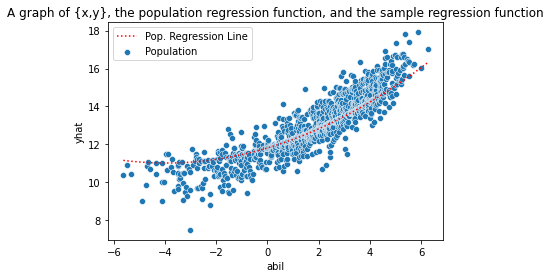

In [27]:
# Set up the objects for our graph: 
# Predicted fitted values
htv['yhat'] = m3.fittedvalues

#Residuals
htv['resid'] = m3.resid

# Create a variable 'yaveduc' in your data set that is the estimated y for the average values for education but that still changes with ability. 
# Hint retrieve all the parameters and set the linear model equation and construct the regrssion in a similar fashion as (iv)
#m4 = smf.ols(formula='educ~8.240226 + 0.190126*12.18 + 0.1008939*12.45 + 0.401462*abil + 0.050599*np.power(abil,2)', data=htv).fit()
htv['yaveduc'] =  8.240226 + 0.190126*12.18 + 0.1008939*12.45 + 0.401462*htv['abil'] + 0.050599*np.power(htv['abil'],2)

# You need to sort the values by abil so that the line plots nicely. Try not doing it and see what happens
htv.sort_values(by=['abil'], inplace=True)

# Create the scatter of the abil vs predicted education function, set the title as "log(Salary) vs log(Sales)"
# Hint see how we used sns.regplot in the handout
sns.scatterplot(x = 'abil', y='yhat', data=htv)

# Add the line that shows the quadratic relation between this two.
# Hint see how we used plt.plot in the handout
plt.plot(htv['abil'], htv['yaveduc'], ':r')


# This code is given to label and produce the graph: 
plt.title("A graph of {x,y}, the population regression function, and the sample regression function" )
plt.legend(['Pop. Regression Line', 'Population'], loc='upper left')
plt.show()



Overall, the quadratic regression line fits a decent amount of the population. This may suggest that treating the *abil* variable as a quadratic may help in part. 

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;